<a href="https://colab.research.google.com/github/AdnanSakal/Text_Classification/blob/main/text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import os
import zipfile

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s "disaster tweets"

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
vstepanenko/disaster-tweets                                     Disaster Tweets                                    656KB  2020-11-12 14:56:58           6204        146  1.0              
vbmokin/nlp-with-disaster-tweets-cleaning-data                  NLP with Disaster Tweets - cleaning data             1MB  2021-09-11 19:24:20           2136         56  0.9117647        
harshithvarma007/disaster-tweets                                Disaster Tweets                                    396KB  2024-03-12 05:12:36             74          6  1.0              
bravo03/nlp-with-disaster-tweets                                N

In [ ]:
!kaggle datasets download -d "vstepanenko/disaster-tweets"

Dataset URL: https://www.kaggle.com/datasets/vstepanenko/disaster-tweets
License(s): CC0-1.0
  0% 0.00/656k [00:00<?, ?B/s]
100% 656k/656k [00:00<00:00, 80.5MB/s]


In [ ]:
zip_ref = zipfile.ZipFile("/content/disaster-tweets.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
dataframe = pd.read_csv("/content/tweets.csv")
dataframe = dataframe.drop(columns = ["id","keyword","location"])

In [ ]:
dataframe

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...
11365,Media should have warned us well in advance. T...,0
11366,i feel directly attacked 💀 i consider moonbin ...,0
11367,i feel directly attacked 💀 i consider moonbin ...,0
11368,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [ ]:
text = dataframe["text"].to_numpy()
target = dataframe["target"].to_numpy()
for i in range(10):
  rand = random.randint(0,len(dataframe["text"].to_numpy()))
  print(f"Text:-\n{text[rand]}\n")
  print("label:-")
  print("disaster" if target[rand] == 1 else "not_disaster\n")
  print(f"-------------\n")

Text:-
Design of AR-15 could derail charges tied to popular rifle https://t.co/zsZ0G6L7wX #10TV https://t.co/VyQ8uNCJC4

label:-
not_disaster

-------------

Text:-
Parkway Drive Donated $34,000 to Australian Wildfire Relief : https://t.co/ffKKglU5tr

label:-
not_disaster

-------------

Text:-
Then you'd get a bag of broken crisps all sitting in the bottom of the bag. The air is… https://t.co/cmQv2PnfIq

label:-
not_disaster

-------------

Text:-
ATTENTION TO ALL FANS: if you guys want to buy his koala merch you can at ---&gt;https://t.co/GMdKv4Bg3j o… https://t.co/AIdKOdAOjY

label:-
not_disaster

-------------

Text:-
A person could theoretically say "Trump will attack a female nominee just like he did Hillary" - I hear peopl…

label:-
not_disaster

-------------

Text:-
ROAD CLOSURE: Reiter Rd is closed about 2 miles east of May Creek Rd for a mudslide that is fully blocking the roadway. T…

label:-
disaster
-------------

Text:-
Does any know how to get the galaxy Far Far away tr

In [ ]:
len(text)

11370

(array([ 295.,  539.,  770., 1128., 1476., 2477., 3075., 1374.,  222.,
          14.]),
 array([ 1. ,  4.1,  7.2, 10.3, 13.4, 16.5, 19.6, 22.7, 25.8, 28.9, 32. ]),
 <BarContainer object of 10 artists>)

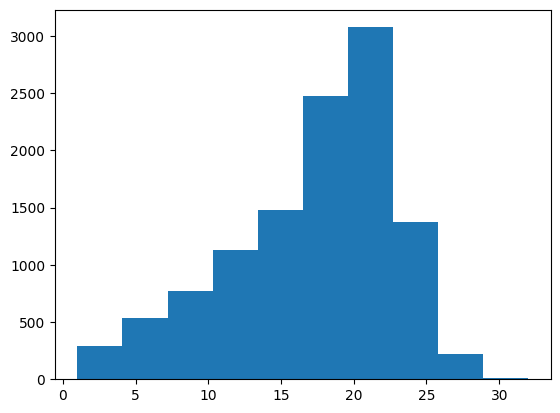

In [ ]:
len_of_word = [len(i.split()) for i in text]
plt.hist(len_of_word)

In [ ]:
np.percentile(len_of_word,98)

26.0

In [ ]:
len(text)

11370

In [ ]:
from tensorflow.keras.layers import TextVectorization
text_vect = TextVectorization(max_tokens = 3000,
                              output_sequence_length = 26
                              )

In [ ]:
text_vect.adapt(text)

In [ ]:
for i in range(10):
  rand = random.randint(0,len(dataframe["text"].to_numpy()))
  print(f"Text:-\n{text[rand]}\n")
  print(f"Text_Vect:-\n{text_vect([text[rand]])}\n")
  print(f"-------------\n")

Text:-
Hey Anne Jesus was not a refugee (a person who has been forced to leave their country in order to escape w…

Text_Vect:-
[[614   1 893  18  26   4   1   4 389  41  30  49 896   3 591  60 205   6
  803   3   1 277   0   0   0   0]]

-------------

Text:-
1) evacuate austrailia 2) gather up the combined nuclear stockpile of the world instead of shooting them at each o… https://t.co/UJlMGcdVrz

Text_Vect:-
[[109 929   1  91   1  50   2   1 138   1   5   2 136 773   5 662  85  20
  741 343   1   0   0   0   0   0]]

-------------

Text:-
GIVE ME BIG SALAMI OR I SHOOT THE HOSTAGES

Text_Vect:-
[[ 422   38  292    1   57    9 1547    2  691    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]]

-------------

Text:-
"How Insects Cope When Blood Rushes to Their Heads" by BY JAMES GORMAN via NYT https://t.co/zc5iRNQRCo https://t.co/25iqCKNiwj

Text_Vect:-
[[  58    1    1   42  300    1    3   60 2440   24   24 2427    1  187
     1    1    1    0    0

In [ ]:
text_vect.get_vocabulary()[:10]

['', '[UNK]', 'the', 'to', 'a', 'of', 'in', 'and', 'is', 'i']

In [ ]:
text_vect.get_vocabulary()[-10:]

['key',
 'kashmiri',
 'jungkook',
 'journey',
 'j4',
 'islamabad',
 'investigating',
 'investigate',
 'interested',
 'intended']

In [ ]:
from tensorflow.keras.layers import Embedding
embed_layer = Embedding(input_dim = 3000,
                        output_dim = 8
                        )

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
def split(x,y):
  train_size = int(0.6*len(text))
  train_data = x[:train_size]
  test_data = x[train_size:]
  train_label = y[:train_size]
  test_label = y[train_size:]
  return train_data,test_data,train_label,test_label

In [ ]:
train_data,test_data,train_label,test_label = split(text,target)

In [ ]:
len(train_data),len(train_label),len(test_data),len(test_label)

(6822, 6822, 4548, 4548)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data,train_label)).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_data,test_label)).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model_0 = Pipeline([
    ("tfidf",TfidfVectorizer()),
    ("clf",MultinomialNB())
])
model_0.fit(train_data,train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
def evaluation_metrics(y_true,y_pred):
  acc = accuracy_score(y_true,y_pred)
  pre,rec,fscore,_ = precision_recall_fscore_support(y_true,y_pred,average = "weighted")
  dic = {
      "precsion":pre,
      "rec":rec,
      "fscore":fscore
  }
  return dic

In [ ]:
y_pred_0 = model_0.predict(test_data)

In [ ]:
model_0_result = evaluation_metrics(y_true = test_label,y_pred = y_pred_0)

In [ ]:
input = tf.keras.layers.Input(shape=[1,],dtype = "string")
x = text_vect(input)
x = embed_layer(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
output = tf.keras.layers.Dense(1,activation = "sigmoid")(x)

model_1 = tf.keras.Model(input,output)
model_1.compile(loss = "binary_crossentropy",
                optimizer = "adam",
                metrics= ["accuracy"]
                )
his_1 = model_1.fit(train_data,train_label,
                    epochs = 10,
                    validation_data = (test_data,test_label),

                    )

Epoch 1/10
214/214 [==============================] - 2s 5ms/step - loss: 0.6187 - accuracy: 0.8220 - val_loss: 0.5488 - val_accuracy: 0.7993
Epoch 2/10
214/214 [==============================] - 1s 4ms/step - loss: 0.4889 - accuracy: 0.8240 - val_loss: 0.5007 - val_accuracy: 0.7993
Epoch 3/10
214/214 [==============================] - 1s 4ms/step - loss: 0.4559 - accuracy: 0.8240 - val_loss: 0.4892 - val_accuracy: 0.7993
Epoch 4/10
214/214 [==============================] - 1s 4ms/step - loss: 0.4263 - accuracy: 0.8240 - val_loss: 0.4665 - val_accuracy: 0.7993
Epoch 5/10
214/214 [==============================] - 1s 4ms/step - loss: 0.3853 - accuracy: 0.8244 - val_loss: 0.4428 - val_accuracy: 0.8004
Epoch 6/10
214/214 [==============================] - 1s 4ms/step - loss: 0.3457 - accuracy: 0.8393 - val_loss: 0.4243 - val_accuracy: 0.8091
Epoch 7/10
214/214 [==============================] - 1s 4ms/step - loss: 0.3119 - accuracy: 0.8629 - val_loss: 0.4123 - val_accuracy: 0.8164
Epoch 

In [ ]:
def plot_loss_curve(his):
  loss = his.history["loss"]
  val_loss = his.history["val_loss"]
  acc = his.history["accuracy"]
  val_acc = his.history["val_accuracy"]

  plt.plot(loss,label = "loss")
  plt.plot(val_loss,label = "val_loss")
  plt.xlabel("epoch")
  plt.title("loss")
  plt.legend()

  plt.figure()

  plt.plot(acc,label = "acc")
  plt.plot(val_acc,label = "val_acc")
  plt.xlabel("epoch")
  plt.title("accuracy")
  plt.legend()


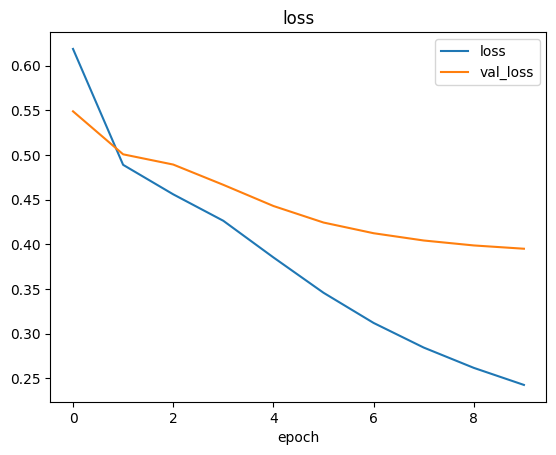

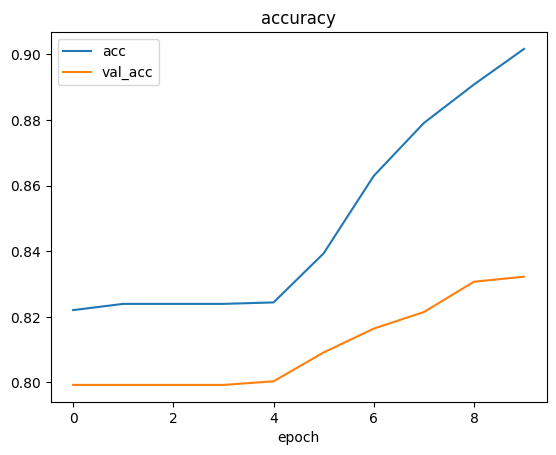

In [ ]:
plot_loss_curve(his_1)

In [ ]:
y_pred_1 = model_1.predict(test_dataset)

143/143 [==============================] - 0s 2ms/step


In [ ]:
model_1_result = evaluation_metrics(test_label,y_pred_1.round())

In [ ]:
model_1_result

{'precsion': 0.6878738227950422,
 'rec': 0.7645118733509235,
 'fscore': 0.7138997571537308}

In [ ]:
y_pred_1.round()

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
input = tf.keras.layers.Input(shape=[1,],dtype = "string")
x = text_vect(input)
x = embed_layer(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Dense(8,activation =  "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1,activation = "sigmoid")(x)

model_2 = tf.keras.Model(input,output)
model_2.compile(loss = "binary_crossentropy",
                optimizer = "adam",
                metrics= ["accuracy"]
                )
his_2 = model_2.fit(train_dataset,
                    epochs = 10,
                    validation_data = test_dataset
                    )

Epoch 1/10
214/214 [==============================] - 2s 5ms/step - loss: 0.5388 - accuracy: 0.7779 - val_loss: 0.4509 - val_accuracy: 0.7993
Epoch 2/10
214/214 [==============================] - 1s 4ms/step - loss: 0.3661 - accuracy: 0.8443 - val_loss: 0.4133 - val_accuracy: 0.8155
Epoch 3/10
214/214 [==============================] - 1s 4ms/step - loss: 0.3073 - accuracy: 0.8665 - val_loss: 0.4022 - val_accuracy: 0.8309
Epoch 4/10
214/214 [==============================] - 1s 4ms/step - loss: 0.2836 - accuracy: 0.8647 - val_loss: 0.4009 - val_accuracy: 0.8336
Epoch 5/10
214/214 [==============================] - 1s 4ms/step - loss: 0.2655 - accuracy: 0.8691 - val_loss: 0.4056 - val_accuracy: 0.8377
Epoch 6/10
214/214 [==============================] - 1s 4ms/step - loss: 0.2508 - accuracy: 0.8717 - val_loss: 0.4164 - val_accuracy: 0.8380
Epoch 7/10
214/214 [==============================] - 1s 4ms/step - loss: 0.2419 - accuracy: 0.8757 - val_loss: 0.4193 - val_accuracy: 0.8349
Epoch 

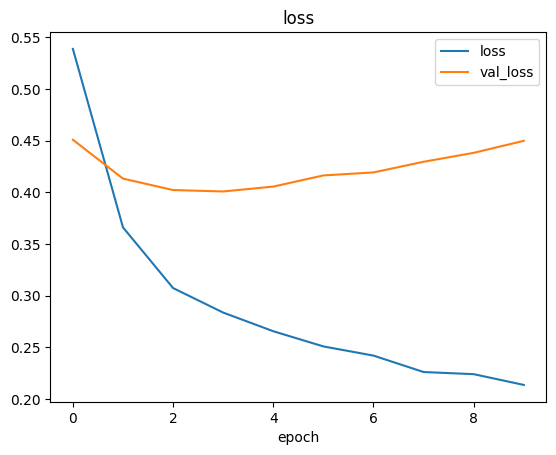

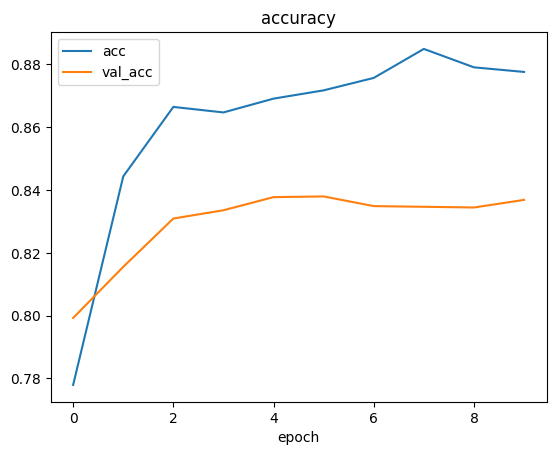

In [ ]:
plot_loss_curve(his_2)

In [ ]:
input = tf.keras.layers.Input(shape=[1,],dtype = "string")
x = text_vect(input)
x = embed_layer(x)
x = tf.keras.layers.Conv1D(8,5,activation = "relu")(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
output = tf.keras.layers.Dense(1,activation = "sigmoid")(x)

model_3 = tf.keras.Model(input,output)
model_3.compile(loss = "binary_crossentropy",
                optimizer = "adam",
                metrics= ["accuracy"]
                )
his_3 = model_3.fit(train_dataset,
                    epochs = 10,
                    validation_data = test_dataset,

                    )

Epoch 1/10
214/214 [==============================] - 2s 5ms/step - loss: 0.4652 - accuracy: 0.8156 - val_loss: 0.4675 - val_accuracy: 0.7993
Epoch 2/10
214/214 [==============================] - 1s 4ms/step - loss: 0.3449 - accuracy: 0.8464 - val_loss: 0.3985 - val_accuracy: 0.8294
Epoch 3/10
214/214 [==============================] - 1s 4ms/step - loss: 0.2398 - accuracy: 0.9109 - val_loss: 0.3825 - val_accuracy: 0.8388
Epoch 4/10
214/214 [==============================] - 1s 5ms/step - loss: 0.1901 - accuracy: 0.9310 - val_loss: 0.3919 - val_accuracy: 0.8375
Epoch 5/10
214/214 [==============================] - 1s 4ms/step - loss: 0.1609 - accuracy: 0.9431 - val_loss: 0.4097 - val_accuracy: 0.8401
Epoch 6/10
214/214 [==============================] - 1s 4ms/step - loss: 0.1371 - accuracy: 0.9531 - val_loss: 0.4288 - val_accuracy: 0.8388
Epoch 7/10
214/214 [==============================] - 1s 6ms/step - loss: 0.1167 - accuracy: 0.9614 - val_loss: 0.4480 - val_accuracy: 0.8364
Epoch 

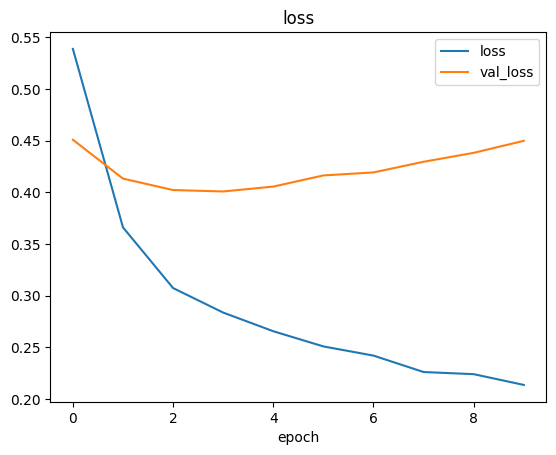

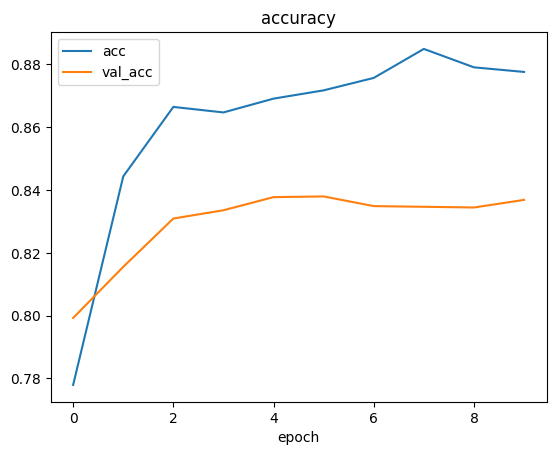

In [ ]:
plot_loss_curve(his_2)

In [ ]:
input = tf.keras.layers.Input(shape = [1,],dtype = "string")
x = text_vect(input)
x = embed_layer(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(1,activation = "sigmoid")(x)

model_4 = tf.keras.Model(input,output)
model_4.compile(loss = "binary_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
his_4 = model_4.fit(train_data,train_label,
                    epochs= 10,
                    validation_data = (test_data,test_label)
                    )

Epoch 1/10
214/214 [==============================] - 2s 5ms/step - loss: 1.1738 - accuracy: 0.1891 - val_loss: 0.8797 - val_accuracy: 0.2142
Epoch 2/10
214/214 [==============================] - 1s 4ms/step - loss: 0.7063 - accuracy: 0.5259 - val_loss: 0.5848 - val_accuracy: 0.7905
Epoch 3/10
214/214 [==============================] - 1s 4ms/step - loss: 0.4672 - accuracy: 0.8351 - val_loss: 0.4722 - val_accuracy: 0.8085
Epoch 4/10
214/214 [==============================] - 1s 4ms/step - loss: 0.3823 - accuracy: 0.8502 - val_loss: 0.4396 - val_accuracy: 0.8102
Epoch 5/10
214/214 [==============================] - 1s 4ms/step - loss: 0.3437 - accuracy: 0.8580 - val_loss: 0.4249 - val_accuracy: 0.8228
Epoch 6/10
214/214 [==============================] - 1s 6ms/step - loss: 0.3179 - accuracy: 0.8668 - val_loss: 0.4149 - val_accuracy: 0.8285
Epoch 7/10
214/214 [==============================] - 4s 18ms/step - loss: 0.2958 - accuracy: 0.8726 - val_loss: 0.4080 - val_accuracy: 0.8316
Epoch

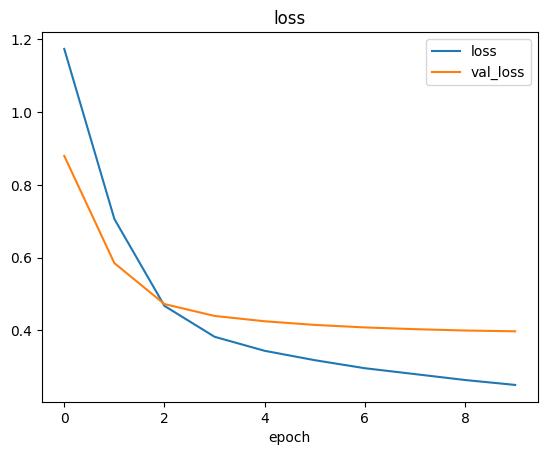

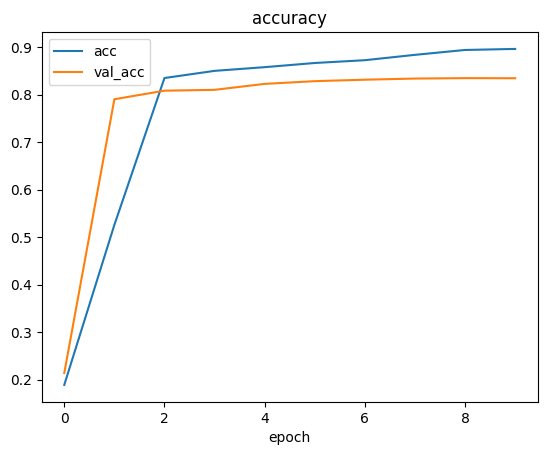

In [ ]:
plot_loss_curve(his_4)

In [ ]:
input = tf.keras.layers.Input(shape = [1,],dtype = "string")
x = text_vect(input)
x = embed_layer(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x =tf.keras.layers.Dense(8,activation = "relu")(x)
output = tf.keras.layers.Dense(1,activation = "sigmoid")(x)
model_5 = tf.keras.Model(input,output)
model_5.compile(loss = "binary_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
his_5 = model_5.fit(train_dataset,
                    epochs= 10,
                    validation_data = test_dataset
                    )

Epoch 1/10
214/214 [==============================] - 2s 5ms/step - loss: 0.4798 - accuracy: 0.7501 - val_loss: 0.4344 - val_accuracy: 0.7995
Epoch 2/10
214/214 [==============================] - 1s 4ms/step - loss: 0.2572 - accuracy: 0.8896 - val_loss: 0.4005 - val_accuracy: 0.8351
Epoch 3/10
214/214 [==============================] - 1s 4ms/step - loss: 0.1882 - accuracy: 0.9252 - val_loss: 0.4061 - val_accuracy: 0.8340
Epoch 4/10
214/214 [==============================] - 1s 4ms/step - loss: 0.1598 - accuracy: 0.9345 - val_loss: 0.4192 - val_accuracy: 0.8349
Epoch 5/10
214/214 [==============================] - 1s 4ms/step - loss: 0.1432 - accuracy: 0.9412 - val_loss: 0.4323 - val_accuracy: 0.8327
Epoch 6/10
214/214 [==============================] - 1s 4ms/step - loss: 0.1310 - accuracy: 0.9471 - val_loss: 0.4488 - val_accuracy: 0.8318
Epoch 7/10
214/214 [==============================] - 1s 4ms/step - loss: 0.1217 - accuracy: 0.9524 - val_loss: 0.4647 - val_accuracy: 0.8318
Epoch 

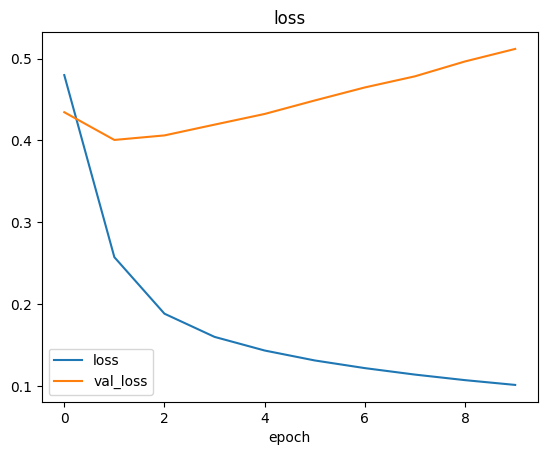

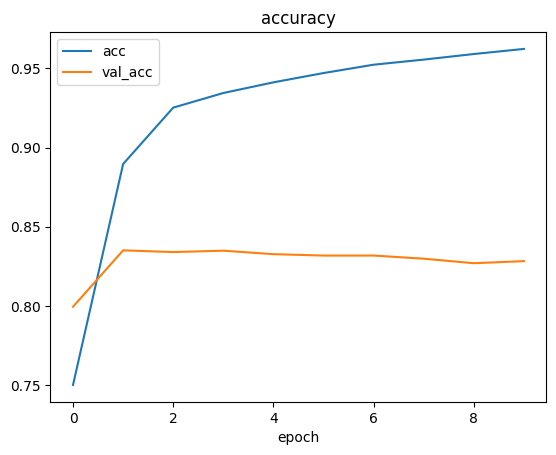

In [ ]:
plot_loss_curve(his_5)

In [ ]:
input = tf.keras.layers.Input(shape=[1,],dtype ="string")
x = text_vect(input)
x = embed_layer(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
output = tf.keras.layers.Dense(1,activation = "sigmoid")(x)

model_6 = tf.keras.Model(input,output)
model_6.compile(loss = "binary_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
model_6_his = model_6.fit(train_data,train_label,
                    epochs = 10,
                    validation_data = (test_data,test_label)
                    )

Epoch 1/10
214/214 [==============================] - 2s 5ms/step - loss: 0.7045 - accuracy: 0.5513 - val_loss: 0.5666 - val_accuracy: 0.7759
Epoch 2/10
214/214 [==============================] - 1s 4ms/step - loss: 0.4223 - accuracy: 0.8480 - val_loss: 0.4506 - val_accuracy: 0.8237
Epoch 3/10
214/214 [==============================] - 1s 4ms/step - loss: 0.3318 - accuracy: 0.8744 - val_loss: 0.4213 - val_accuracy: 0.8245
Epoch 4/10
214/214 [==============================] - 1s 4ms/step - loss: 0.2985 - accuracy: 0.8804 - val_loss: 0.4092 - val_accuracy: 0.8263
Epoch 5/10
214/214 [==============================] - 1s 4ms/step - loss: 0.2786 - accuracy: 0.8827 - val_loss: 0.4021 - val_accuracy: 0.8360
Epoch 6/10
214/214 [==============================] - 1s 4ms/step - loss: 0.2530 - accuracy: 0.8945 - val_loss: 0.3970 - val_accuracy: 0.8362
Epoch 7/10
214/214 [==============================] - 1s 4ms/step - loss: 0.2345 - accuracy: 0.9031 - val_loss: 0.3942 - val_accuracy: 0.8384
Epoch 

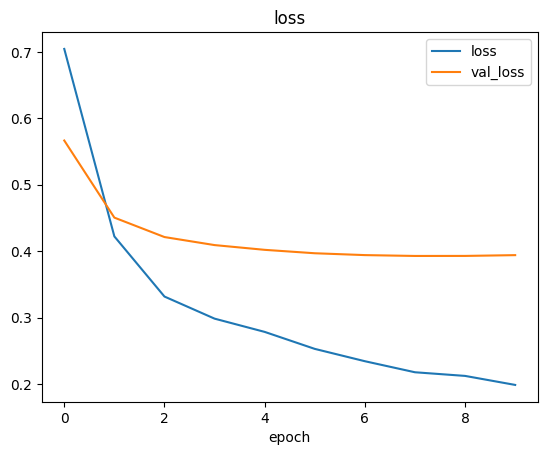

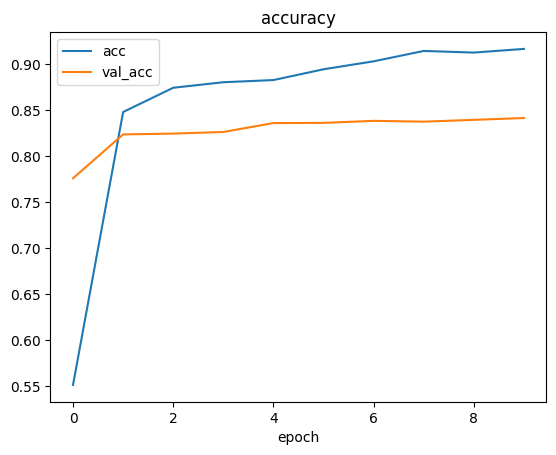

In [ ]:
plot_loss_curve(model_6_his)

In [ ]:
input = tf.keras.layers.Input(shape = [1,],dtype = "string")
x = text_vect(input)
x = embed_layer(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
output = tf.keras.layers.Dense(1,activation = "sigmoid")(x)

model_7 = tf.keras.Model(input,output)
model_7.compile(loss = "binary_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
his_7 = model_7.fit(train_data,train_label,
                    epochs = 10,
                    validation_data = (test_data,test_label)
                    )

Epoch 1/10
214/214 [==============================] - 3s 7ms/step - loss: 0.6662 - accuracy: 0.7429 - val_loss: 0.5494 - val_accuracy: 0.7993
Epoch 2/10
214/214 [==============================] - 1s 4ms/step - loss: 0.5401 - accuracy: 0.8093 - val_loss: 0.5006 - val_accuracy: 0.7993
Epoch 3/10
214/214 [==============================] - 1s 4ms/step - loss: 0.4389 - accuracy: 0.8272 - val_loss: 0.4629 - val_accuracy: 0.7993
Epoch 4/10
214/214 [==============================] - 1s 4ms/step - loss: 0.3643 - accuracy: 0.8415 - val_loss: 0.4361 - val_accuracy: 0.8028
Epoch 5/10
214/214 [==============================] - 1s 4ms/step - loss: 0.3136 - accuracy: 0.8618 - val_loss: 0.4191 - val_accuracy: 0.8135
Epoch 6/10
214/214 [==============================] - 1s 4ms/step - loss: 0.2741 - accuracy: 0.8864 - val_loss: 0.4074 - val_accuracy: 0.8252
Epoch 7/10
214/214 [==============================] - 1s 4ms/step - loss: 0.2481 - accuracy: 0.9038 - val_loss: 0.4023 - val_accuracy: 0.8333
Epoch 

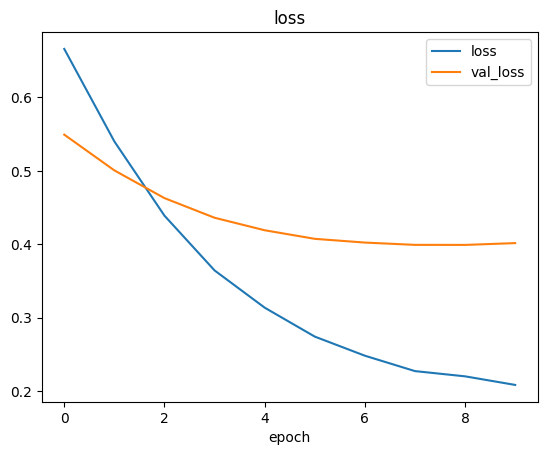

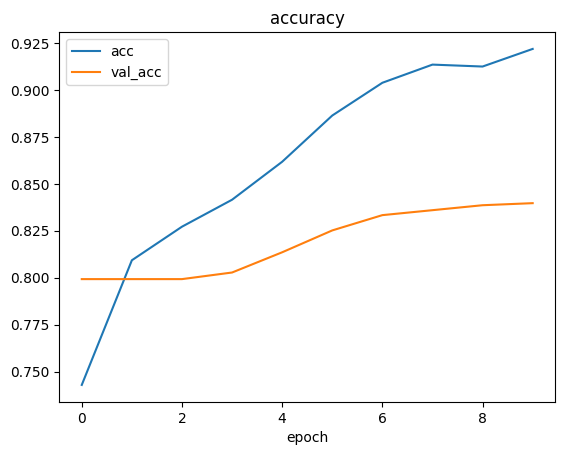

In [ ]:
plot_loss_curve(his_7)

In [ ]:
input = tf.keras.layers.Input(shape=[1,],dtype ="string")
x = text_vect(input)
x = embed_layer(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1,activation = "sigmoid")(x)

model_8 = tf.keras.Model(input,output)
model_8.compile(loss = "binary_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
his_8 = model_8.fit(train_data,train_label,
                    epochs = 10,
                    validation_data = (test_data,test_label)
                    )

Epoch 1/10
214/214 [==============================] - 3s 8ms/step - loss: 0.5971 - accuracy: 0.6772 - val_loss: 0.4699 - val_accuracy: 0.8199
Epoch 2/10
214/214 [==============================] - 1s 4ms/step - loss: 0.4100 - accuracy: 0.8242 - val_loss: 0.4160 - val_accuracy: 0.8298
Epoch 3/10
214/214 [==============================] - 1s 4ms/step - loss: 0.3409 - accuracy: 0.8619 - val_loss: 0.3981 - val_accuracy: 0.8338
Epoch 4/10
214/214 [==============================] - 1s 4ms/step - loss: 0.3067 - accuracy: 0.8719 - val_loss: 0.3891 - val_accuracy: 0.8399
Epoch 5/10
214/214 [==============================] - 1s 4ms/step - loss: 0.2840 - accuracy: 0.8817 - val_loss: 0.3846 - val_accuracy: 0.8419
Epoch 6/10
214/214 [==============================] - 1s 4ms/step - loss: 0.2649 - accuracy: 0.8863 - val_loss: 0.3825 - val_accuracy: 0.8456
Epoch 7/10
214/214 [==============================] - 1s 4ms/step - loss: 0.2570 - accuracy: 0.8914 - val_loss: 0.3823 - val_accuracy: 0.8467
Epoch 

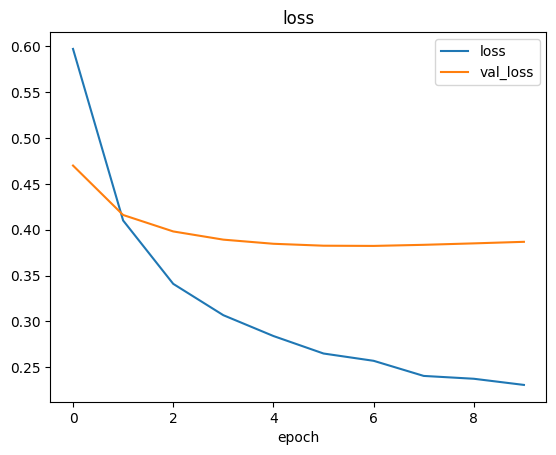

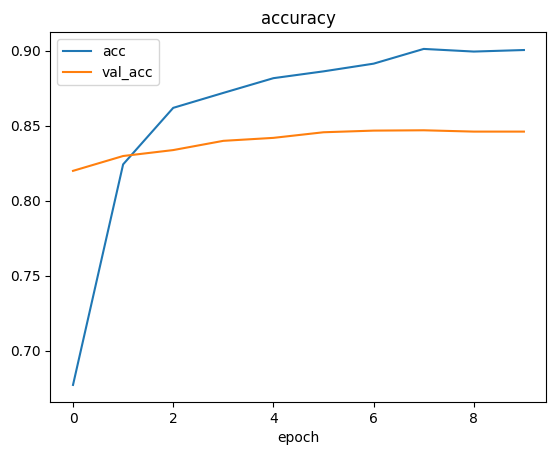

In [ ]:
plot_loss_curve(his_8)

In [ ]:
input = tf.keras.layers.Input(shape=[1,],dtype ="string")
x = text_vect(input)
x = embed_layer(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Dropout(0.1)(x)
output = tf.keras.layers.Dense(1,activation = "sigmoid")(x)

model_9 = tf.keras.Model(input,output)
model_9.compile(loss = "binary_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )
his_9 = model_9.fit(train_data,train_label,
                    epochs = 10,
                    validation_data = (test_data,test_label)
                    )

Epoch 1/10
214/214 [==============================] - 3s 9ms/step - loss: 0.4613 - accuracy: 0.8050 - val_loss: 0.4692 - val_accuracy: 0.8065
Epoch 2/10
214/214 [==============================] - 1s 6ms/step - loss: 0.3018 - accuracy: 0.8836 - val_loss: 0.4187 - val_accuracy: 0.8241
Epoch 3/10
214/214 [==============================] - 1s 4ms/step - loss: 0.2481 - accuracy: 0.8967 - val_loss: 0.4054 - val_accuracy: 0.8307
Epoch 4/10
214/214 [==============================] - 1s 4ms/step - loss: 0.2189 - accuracy: 0.9071 - val_loss: 0.4013 - val_accuracy: 0.8325
Epoch 5/10
214/214 [==============================] - 1s 4ms/step - loss: 0.1965 - accuracy: 0.9208 - val_loss: 0.4004 - val_accuracy: 0.8358
Epoch 6/10
214/214 [==============================] - 1s 4ms/step - loss: 0.1778 - accuracy: 0.9298 - val_loss: 0.4019 - val_accuracy: 0.8369
Epoch 7/10
214/214 [==============================] - 1s 4ms/step - loss: 0.1690 - accuracy: 0.9330 - val_loss: 0.4047 - val_accuracy: 0.8366
Epoch 

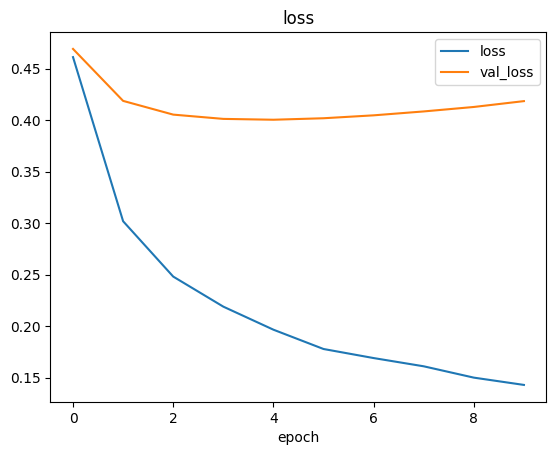

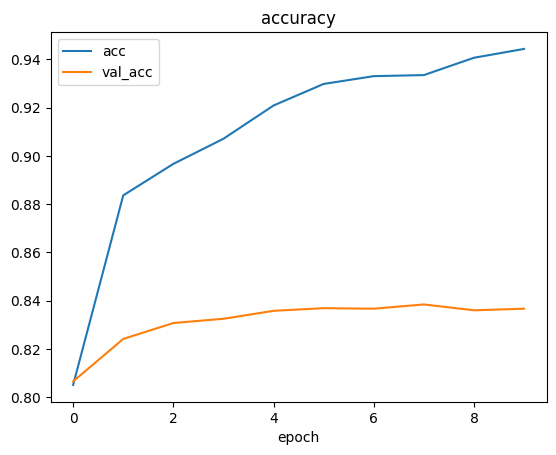

In [ ]:
plot_loss_curve(his_9)

In [ ]:
y_pred_6 = model_6.predict(test_data)

143/143 [==============================] - 0s 2ms/step


In [ ]:
y_pred_6

array([[0.1912765 ],
       [0.005589  ],
       [0.06001904],
       ...,
       [0.07675225],
       [0.0957778 ],
       [0.16917492]], dtype=float32)

In [ ]:
model_6_result = evaluation_metrics(test_label,y_pred_6.round())
model_6_result

{'precsion': 0.8237923567734876,
 'rec': 0.8390501319261213,
 'fscore': 0.8249034950642401}

In [ ]:
class_names = ["not_disaster","disaster"]

In [ ]:
dataframe = pd.DataFrame({
    "text":test_data,
    "org_class": [class_names[i] for i in tf.squeeze(test_label)],
    "test_label": tf.squeeze(test_label),
    "pred_label": tf.cast(tf.squeeze(y_pred_6).numpy().round(),dtype=tf.int32),
    "pred_class" : [class_names[i] for i in tf.cast(tf.squeeze(y_pred_6).numpy().round(),dtype=tf.int32)],
    "pred_prob" : tf.squeeze(y_pred_6)
})
dataframe

,text,org_class,test_label,pred_label,pred_class,pred_prob
0,• 29 injuries to 16 players. And that was only...,disaster,1,0,not_disaster,0.191277
1,What would be the fee for Butland from Stoke -...,not_disaster,0,0,not_disaster,0.005589
2,"Easy to say Philly had a bad secondary, but th...",not_disaster,0,0,not_disaster,0.060019
3,The A&amp;Es at Queen Elizabeth Hospital and U...,not_disaster,0,0,not_disaster,0.251241
4,We need options for rotation it’s the reason w...,not_disaster,0,0,not_disaster,0.097198
...,...,...,...,...,...,...
4543,Media should have warned us well in advance. T...,not_disaster,0,0,not_disaster,0.112634
4544,i feel directly attacked 💀 i consider moonbin ...,not_disaster,0,0,not_disaster,0.076752
4545,i feel directly attacked 💀 i consider moonbin ...,not_disaster,0,0,not_disaster,0.076752
4546,"ok who remember ""outcast"" nd the ""dora"" au?? T...",not_disaster,0,0,not_disaster,0.095778


In [ ]:
dataframe["correct"] = dataframe["test_label"] == dataframe["pred_label"]
dataframe

,text,org_class,test_label,pred_label,pred_class,pred_prob,correct
0,• 29 injuries to 16 players. And that was only...,disaster,1,0,not_disaster,0.191277,False
1,What would be the fee for Butland from Stoke -...,not_disaster,0,0,not_disaster,0.005589,True
2,"Easy to say Philly had a bad secondary, but th...",not_disaster,0,0,not_disaster,0.060019,True
3,The A&amp;Es at Queen Elizabeth Hospital and U...,not_disaster,0,0,not_disaster,0.251241,True
4,We need options for rotation it’s the reason w...,not_disaster,0,0,not_disaster,0.097198,True
...,...,...,...,...,...,...,...
4543,Media should have warned us well in advance. T...,not_disaster,0,0,not_disaster,0.112634,True
4544,i feel directly attacked 💀 i consider moonbin ...,not_disaster,0,0,not_disaster,0.076752,True
4545,i feel directly attacked 💀 i consider moonbin ...,not_disaster,0,0,not_disaster,0.076752,True
4546,"ok who remember ""outcast"" nd the ""dora"" au?? T...",not_disaster,0,0,not_disaster,0.095778,True


In [ ]:
new_dataframe = dataframe[dataframe["correct"] != True].sort_values(by = ["pred_prob"],ascending = False)
new_dataframe

,text,org_class,test_label,pred_label,pred_class,pred_prob,correct
2327,i'm hooked on the old decaying drain culvert t...,not_disaster,0,1,disaster,0.970765,False
3549,"10 years ago today, an IDF humanitarian delega...",not_disaster,0,1,disaster,0.955168,False
86,NEWS ALERT: Issues impacting driver's license ...,not_disaster,0,1,disaster,0.927967,False
2341,I could have told EMM what the problem with th...,not_disaster,0,1,disaster,0.918628,False
3508,Dan Goodin:'Exploit that gives remote access a...,not_disaster,0,1,disaster,0.911552,False
...,...,...,...,...,...,...,...
4224,There's method to the madness with the Califor...,disaster,1,0,not_disaster,0.004656,False
3475,#TheAustralian never fails to disappoint. The ...,disaster,1,0,not_disaster,0.004213,False
1743,Gorgeous Maine coon! Those eyes! One of my 3 i...,disaster,1,0,not_disaster,0.003514,False
827,Don’t forget that part of that is nuclear powe...,disaster,1,0,not_disaster,0.002145,False


In [ ]:
for i,row in enumerate(new_dataframe[10:20].itertuples()):
  print(f"Text:-\n{row[1]}\n")
  print(f"org_class:- {row[2]}\npred_class:- {row[5]}")
  print(f"\n-------------\n")

Text:-
🇦🇺 180 people so far charged with arson during Australian bushfires? False ❌ We collated police figures from across Aust…

org_class:- not_disaster
pred_class:- disaster

-------------

Text:-
#SupremeCourt hearing matter related to Four apartment complexes - H2O Holy Faith, twin towers of Alfa Serene, Golden…

org_class:- not_disaster
pred_class:- disaster

-------------

Text:-
America's #BlueGreenTeam in action! An F-35B Lightning II aircraft takes off from the flight deck of the #USNavy amphibi…

org_class:- not_disaster
pred_class:- disaster

-------------

Text:-
//WOTV NEWS//: One-Of-A-Kind Armored Storm-Chasing Vehicle; Withstands 175 MPH Winds... https://t.co/Yf0EufWNSp

org_class:- not_disaster
pred_class:- disaster

-------------

Text:-
When buildings collapse, search and rescue crews use dogs. Why? https://t.co/rgjGgDVziV

org_class:- not_disaster
pred_class:- disaster

-------------

Text:-
Quarantine officials are facing criticism for allegedly causing damage to t